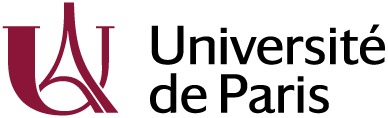
# Intro to Python - Class 5
## Sylvain Lobry, 21/11/2022

In today's class, we will see:
* Exceptions (from last class)
* Numpy

## 0 Before we start
Questions about the project?

## 1 Exceptions

Just as in C++ (and in most languages), Python features an exception mechanism which will allow you to handle properly errors opping up at execution time. The base syntax to handle exceptions in Python is the following:

```
try:
    #Some instructions which might throw an exception
except ExceptionName
    #Some instructions to handle the exception
```

If an exception is raised in the try clause, the instruction flow is stopped. Then, if the exception match the ExceptionName, the except clause is executed. If it does not match, the exception can still be caught if you are in another try/except statement. If not, it will stop the program execution.

Let's consider the following example:

In [1]:
try:
    print("Before raising exception")
    1/0
    print("After raising exception")
except ZeroDivisionError:
    print("Got it")

Before raising exception
Got it


Here, ZeroDivisionError is an exception defined by Python.
If it was another exception, we would have the following

In [2]:
try:
    print("Before raising exception")
    1/0
    print("After raising exception")
except OverflowError:
    print("Got it")

Before raising exception


ZeroDivisionError: division by zero

We are not going to list all of the exceptions built in Python. You can find the [full list](https://docs.python.org/3/library/exceptions.html#exception-hierarchy) in the documentation.

You can also define a list of exceptions:

In [3]:
try:
    print("Before raising exception")
    1/0
    print("After raising exception")
except (OverflowError, ZeroDivisionError):
    print("Got it")

Before raising exception
Got it


Or no exception at all, in which case any exception will get caught:

In [ ]:
try:
    print("Before raising exception")
    1/0
    print("After raising exception")
except:
    print("Got it")

You can also get more information about the exception by using the following syntax:

In [4]:
try:
    print("Before raising exception")
    1/0
    print("After raising exception")
except ZeroDivisionError as e:
    print(e)

Before raising exception
division by zero


It is also easy to raise exceptions with the keyword `raise`. In argument, you can pass details about the reason you are throwing the exception. This can be particularly useful to do something with the exception in a part of the program, while still transmitting it along the call stack.

In [5]:
try:
    raise ZeroDivisionError("just because")
except ZeroDivisionError as e:
    print(e)

just because


You can also create your own exceptions by defining a class deriving from the class `Exception`:

In [6]:
class PAException(Exception):
    pass

try:
    raise PAException("We are reaching the end of this part!!")
except PAException as e:
    print(e)

We are reaching the end of this part!!


Finally, let's have a look at `finally`. This clause will execute whether an exception was raised or not. It can be useful to clean-up the program before exiting.

In [7]:
def div(x, y):
    try:
        print("Before raising exception")
        x / y
        print("After raising exception")
    except ZeroDivisionError as e:
        print(e)
    finally:
        print("Still executing that")
        
div(3, 2)
print("="*10)
div(2, 0)


Before raising exception
After raising exception
Still executing that
Before raising exception
division by zero
Still executing that


## 2 Numpy

### 2.1 The problem with Python lists

Python lists are quite useful (I hope you are convinced of it by now!). One of the nice features of it is the fact that it can hold objects of different types. This comes from the fact that in practice, a list is a collection of pointer to objects.

Because of that, when you want to manipulate a list, the program needs to search the memory for each element and to perform dynamic type checking. As such, it is sub-optimal for large quantities of data of a same type (which could be put contiuously in the memory, and the type would be known. Let's consider the following example:

In [8]:
import time

t_start = time.time()
dummy_op = [i*7 for i in range(int(1e8))]
print(f"Time: {time.time() - t_start}")

Time: 7.481106996536255


Python is not particularly fast to handle large amount of data as arrays. Indeed, being efficient at scientific computing is not part of the core goals of the language.

However, due to many factors (one of them being that it is easy to use, also for non computer-scientists), Python attracted computer scientists early on.

Two packages (numeric (1995) and numarray) were widely used. While numarray was more flexible, although it was slower than numeric for small arrays and its C interface was not convenient ([more info](https://scipy.github.io/old-wiki/pages/History_of_SciPy))

In 2005, NumPy was created as the reunion of both. Since then, it is widely used Python's scientifc community and at the base of many other packages. Remember our example from before?

In [9]:
import numpy as np

t_start = time.time()
dummy_op = [i*7 for i in range(int(1e8))]
print(f"Time (list): {time.time() - t_start}")

t_start = time.time()
dummy_op2 = np.arange(int(1e8)) * 7
print(f"Time (numpy array): {time.time() - t_start}")

Time (list): 12.118396759033203
Time (numpy array): 0.43936705589294434


In addition to being faster, it also supports many array/matrix/tensor operations.

The documentation of Numpy is available [here](https://numpy.org/doc/stable/).

In can be installed with `conda` or `pip`, or directly from your IDE.

Most of the time, numpy is imported with the short name np:

In [ ]:
import numpy as np

### 2.2 Numpy arrays

As outlined before, numpy's main component is an array called `ndarray`. An array can be created from a sequence (e.g. list, set, ...) through the function `np.array`:

In [5]:
import numpy as np
arr = np.array([1,2,3])
print(arr)
print(type(arr))

[1 2 3]
<class 'numpy.ndarray'>


Here, `ndarray` stands for N-Dimensional array. This is:
* an array that contains one type of elements (e.g. only ints, only floats)
* an array where the data is mapped contiguously in memory

To define an array of more than one dimension, simply put imbricated sequences:

In [11]:
arr = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(arr)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


Note that the following does not work as intented. Can you guess why?

In [1]:
arr = np.array([[1,2,3,4],[5,6,7],[9,10,11,12]])
print(arr)

NameError: name 'np' is not defined

(The elements are not of the same size)

Numpy's arrays have several attributes:
* shape will give you a tuple of the size of each dimension
* ndim will give you the number of dimensions
* dtype the type of the data
* and size is the number of elements in the array

In [13]:
arr =  np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]])
print(arr)

print(arr.shape)
print(arr.ndim)
print(arr.dtype)
print(arr.size)

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
2
int64
12


There are other ways to create arrays, in particular for a given size (with elements to be filled later) or with very specific contents.

The first one is np.zeros, which takes a tuple indicating the shape:

In [14]:
print(np.zeros((3,10)))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Quiz: How do you create a (1D) vector filled with 0s of size 5?
```
vec = np.zeros(????)
```

In [15]:
vec = np.zeros((5,))
print(vec)

[0. 0. 0. 0. 0.]


Quiz number 2: are the following lines the same?
```
    vec1 = np.zeros((5,))
    vec2 = np.zeros((5, 1))
```

In [16]:
vec1 = np.zeros((5,))
vec2 = np.zeros((5, 1))
print(f"vec1 = {vec1}")
print("vec2 =")
print(vec2)

vec1 = [0. 0. 0. 0. 0.]
vec2 =
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]]


There are two more functions of the same type to create arrays:
* np.ones (which will fill the array with ones);
* and np.empty (which will not fill the array, the contents only depends on what was in the memory at that time):

In [17]:
print(np.ones((2,3)))
print(np.empty((4,2)))

[[1. 1. 1.]
 [1. 1. 1.]]
[[0.e+000 4.e-323]
 [0.e+000 0.e+000]
 [0.e+000 0.e+000]
 [0.e+000 0.e+000]]


Let's look at functions to create sequences of numbers. First `np.arange` which is similar to the `range` built-in, but returns an array:

In [18]:
arr = np.arange(3)
print(arr)

[0 1 2]


One nice addition of `arange` with respect to `range` is the capacity to take floats:

In [19]:
arr = np.arange(0, 6, 0.2)
print(arr)

[0.  0.2 0.4 0.6 0.8 1.  1.2 1.4 1.6 1.8 2.  2.2 2.4 2.6 2.8 3.  3.2 3.4
 3.6 3.8 4.  4.2 4.4 4.6 4.8 5.  5.2 5.4 5.6 5.8]


Another function is useful if you want to sample a specific number of points in an interval. Of course, you could do that with arange and a bit of basic maths, but `linspace` will simplify the task:

In [20]:
arr = np.linspace(0, 5, 11) #Sample 11 points (with the same distance) between 0 and 5
print(arr)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5. ]


Finally, let's look at one more useful method to create/modify arrays: `reshape`. As the name suggest, this method will return a new array with  the requested shape:

In [21]:
arr = np.arange(20)
print(f"Array of shape {arr.shape}")
print(arr)

arr = arr.reshape((4,5))
print(f"Array of shape {arr.shape}")
print(arr)

Array of shape (20,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Array of shape (4, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]


Note that this method will give you an error if the new shape does not match the number of elements in the original array:

In [22]:
arr = np.arange(20)
print(f"Array of shape {arr.shape}")
print(arr)

arr = arr.reshape((3,5))

Array of shape (20,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


ValueError: cannot reshape array of size 20 into shape (3,5)

In this case, you can use the `resize` method which will (in-place!) change the shape of the array and pad extra values with `0`. This does not work if the new size is less than the original size:

In [23]:
arr = np.arange(20)
print(f"Array of shape {arr.shape}")
print(arr)

arr.resize((5,5))
print(f"Array of shape {arr.shape}")
print(arr)

Array of shape (20,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
Array of shape (5, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [ 0  0  0  0  0]]


### 2.2 On the types of arrays

We have seen how to check the type of arrays, with the attribute `dtype`. You might have noticed that the methods `zeros`, `ones` and `empty` return a float array:

In [24]:
print(np.ones((5,5)).dtype)

float64


However, the first array that we created was filled with integers:

In [25]:
print(np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]]).dtype)

int64


In this notation, you have the type of the object, followed by the number of bytes it takes in memory.

Note that thid dtype is itself an object (of course!):

In [26]:
dt = np.array([[1,2,3,4],[5,6,7,8],[9,10,11,12]]).dtype
dir(dt)

['__bool__',
 '__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__len__',
 '__lt__',
 '__mul__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'alignment',
 'base',
 'byteorder',
 'char',
 'descr',
 'fields',
 'flags',
 'hasobject',
 'isalignedstruct',
 'isbuiltin',
 'isnative',
 'itemsize',
 'kind',
 'metadata',
 'name',
 'names',
 'ndim',
 'newbyteorder',
 'num',
 'shape',
 'str',
 'subdtype',
 'type']

NumPy defines several built-in types, summarized in the following figure (from NumPy's documentation):
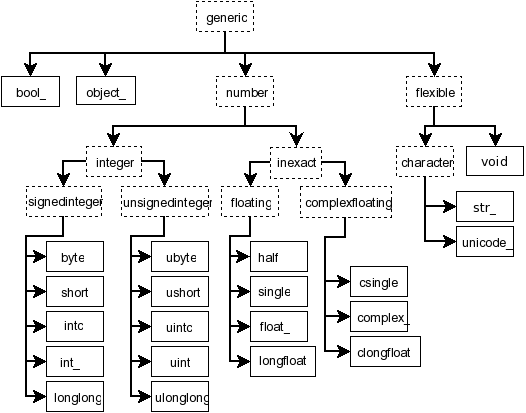

Note that it is also possible to create your own types (by precising the endianness, the ype, the size, ... but this goes out of the scope of this class)

#### 2.2.1 Choosing the type at the creation of the array

So far, dtype were assigned automatically at the creation of the array. Note that it will try to find a compatible type:

In [29]:
arr = np.array([[1,"2",3,4],[5,6,7,8],[9,10,11,12]])
print(arr.dtype)
print(arr)

<U21
[['1' '2' '3' '4']
 ['5' '6' '7' '8']
 ['9' '10' '11' '12']]


Note that "<U21" stands for unicode strings with 21 characters or less

But you can also force it by giving directly the dtype:

In [28]:
arr = np.array([[1,"2",3,4],[5,6,7,8],[9,10,11,12]], dtype=np.int16)
print(arr.dtype)
print(arr)

int16
[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]


#### 2.2.2 Conversion

The right method to cast an array to a specific type is to use the method `astype()` on the array. It will return a copy, cast to the specified type:

In [30]:
arr_f = np.zeros((3,3))
print(arr_f.dtype)
print(arr_f)

arr_i = arr_f.astype(np.int32)
print(arr_i.dtype)
print(arr_i)

float64
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
int32
[[0 0 0]
 [0 0 0]
 [0 0 0]]


Warning: you should **NOT** try to modify the dtype directly, even though you can. This can lead to unwanted behavior:

In [31]:
arr_f = np.zeros((3,3))
print(arr_f.dtype)
print(arr_f)

arr_f.dtype = np.int32
print(arr_f.dtype)

float64
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]
int32


Can you guess what will happen?

In [32]:
print(arr_f)
print(arr_f.shape)

[[0 0 0 0 0 0]
 [0 0 0 0 0 0]
 [0 0 0 0 0 0]]
(3, 6)


### 2.3 Operations on arrays
In NumPy, operations are applied element-wise (i.e.: the operation will return an array of the same size as the initial array(s) and the operator is applied element by element). For some of them, this is not surprising:

In [6]:
arr1 = np.arange(20).reshape((4,5))
arr2 = np.ones(arr1.shape) * 2
print("arr1:")
print(arr1)
print("arr2:")
print(arr2)

print("Addition")
print(arr1 + arr2)
print("Substraction")
print(arr1 - arr2)

arr1:
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
arr2:
[[2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]
 [2. 2. 2. 2. 2.]]
Addition
[[ 2.  3.  4.  5.  6.]
 [ 7.  8.  9. 10. 11.]
 [12. 13. 14. 15. 16.]
 [17. 18. 19. 20. 21.]]
Substraction
[[-2. -1.  0.  1.  2.]
 [ 3.  4.  5.  6.  7.]
 [ 8.  9. 10. 11. 12.]
 [13. 14. 15. 16. 17.]]


However, for the multiplication, it is less straightforward and can lead to mistakes (in particular, if you are used to programming with Matlab):

In [34]:
arr1 * arr2

array([[ 0.,  2.,  4.,  6.,  8.],
       [10., 12., 14., 16., 18.],
       [20., 22., 24., 26., 28.],
       [30., 32., 34., 36., 38.]])

Matrix multiplication is done with the method `dot()` or `np.matmul()`. Note the transpose obtained with attribute `T`:

In [9]:
print(arr1.dot(arr2.T))
print(np.matmul(arr1, arr2.T ))

[[ 20.  20.  20.  20.]
 [ 70.  70.  70.  70.]
 [120. 120. 120. 120.]
 [170. 170. 170. 170.]]
[[ 20.  20.  20.  20.]
 [ 70.  70.  70.  70.]
 [120. 120. 120. 120.]
 [170. 170. 170. 170.]]


Unary operators are often implemented through methods. You will often have to use `min`, `max` or `sum`:

In [36]:
print(arr1)

print(arr1.sum())
print(arr1.max())
print(arr1.min())

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
190
19
0


These operations can be applied on a specific axis. To fully understand this, let's go have a look to the shape of our array:

In [37]:
arr1.shape

(4, 5)

Here the first axis (index 0) is the one with a shape of 4, the second with a shape of 5. Therefore, if you call a unary operation with the named argument `axis`, this operation will be applied only on this axis. Let's take the example of sum:

In [38]:
print(arr1)
print(arr1.sum())
print(arr1.sum(axis=0))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
190
[30 34 38 42 46]


There are also other operations implemented as what is called "universal functions". They will also apply the operation element-wise. For instance, `np.sqrt()`: 

In [39]:
print(arr1)
print(np.sqrt(arr1))

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]
[[0.         1.         1.41421356 1.73205081 2.        ]
 [2.23606798 2.44948974 2.64575131 2.82842712 3.        ]
 [3.16227766 3.31662479 3.46410162 3.60555128 3.74165739]
 [3.87298335 4.         4.12310563 4.24264069 4.35889894]]


### 2.4 Indexing arrays
To index NumPy's arrays, the notation is similar to those of lists. Therefore, the following works as you know:

In [40]:
arr = np.arange(5)
print(arr)

print(f"arr[2] = {arr[2]}")
print(f"arr[:2] = {arr[:2]}")
print(f"arr[2:] = {arr[2:]}")
print(f"arr[1:3] = {arr[1:3]}")
print(f"arr[-1] = {arr[-1]}")
print(f"arr[:] = {arr[:]}")

[0 1 2 3 4]
arr[2] = 2
arr[:2] = [0 1]
arr[2:] = [2 3 4]
arr[1:3] = [1 2]
arr[-1] = 4
arr[:] = [0 1 2 3 4]


When the array has more than one dimension, you can either use the notation `[i, j]` or `[i][j]` (for a 2 dimensional array). Note that in general, the first one is prefered:

In [41]:
arr = np.arange(25).reshape((5,5))

print(arr)
print(f"arr[1, 2] = {arr[1, 2]}")
print(f"arr[2, :] = {arr[2, :]}")
print(f"arr[:, 2:4] = \n{arr[:, 2:4]}")

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
arr[1, 2] = 7
arr[2, :] = [10 11 12 13 14]
arr[:, 2:4] = 
[[ 2  3]
 [ 7  8]
 [12 13]
 [17 18]
 [22 23]]


One last method of indexing that we will see is to index an array with... another array. This is often useful to mask an array. The array that we will use to index should be filled with booleans:

In [42]:
arr = np.arange(25).reshape((5,5)) + 3
arr2 = np.sqrt(arr)

mask = arr2 > 5
print(f"Array = \n{arr}")
print(f"Mask = \n{mask}")
arr[mask] = 0
print(f"Array = \n{arr}")

Array = 
[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25 26 27]]
Mask = 
[[False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False False False]
 [False False False  True  True]]
Array = 
[[ 3  4  5  6  7]
 [ 8  9 10 11 12]
 [13 14 15 16 17]
 [18 19 20 21 22]
 [23 24 25  0  0]]


### 2.5 Saving and loading arrays

Arrays can be saved using the function `np.save(filename, arr)`. By default, it will append the extension '.npy' at the end of the filename if it is not already there.

In [43]:
import os

folder = "/tmp/testnp"
if not os.path.exists(folder):
    os.mkdir(folder)
np.save(os.path.join(folder, "arr"), np.ones((7,7)))

os.listdir(folder)

['arr.npy']

It can then be loaded with `np.load(filename)`. Do not forget to add the '.npy':

In [44]:
arr = np.load(os.path.join(folder, "arr.npy"))
print(arr)

[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


## Conclusion

Today, we focused on NumPy. It might not seem straightforward from this, but NumPy is in great parts what made Python so popular among scientists. It also made Python a good alternative to Matlab, which uses array as a base for basically everything.

In both data science and computer vision, arrays are basically what you will manipulate on a day to day basis.

## Questions?